In [305]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [306]:
Data = pd.read_csv('./titanic_dataset.csv')

In [307]:
Data['Survived'] = Data['Survived'].astype('int64')

In [308]:
Data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [309]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

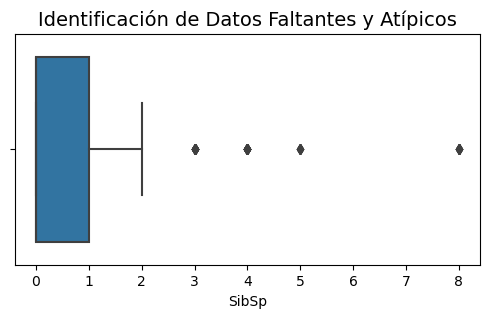

In [310]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['SibSp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=14)

In [311]:
print("Cantidad de Registros con cero en PassengerId: ",Data['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en Survived: ",Data['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ",Data['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ",Data['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",Data['Fare'].isin([0]).sum())

Cantidad de Registros con cero en PassengerId:  0
Cantidad de Registros con cero en Survived:  549
Cantidad de Registros con cero en SibSp:  608
Cantidad de Registros con cero en Parch:  678
Cantidad de Registros con cero en Fare:  15


In [312]:
Data['PassengerId']=Data['PassengerId'].replace(0,Data['PassengerId'].mean())
Data['Survived']=Data['Survived'].replace(0,Data['Survived'].mean())
Data['SibSp']=Data['SibSp'].replace(0,Data['SibSp'].mean())
Data['Parch']=Data['Parch'].replace(0,Data['Parch'].mean())
Data['Fare']=Data['Fare'].replace(0,Data['Fare'].mean())

In [313]:
print("Cantidad de Registros con cero en PassengerId: ",Data['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en Survived: ",Data['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ",Data['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ",Data['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",Data['Fare'].isin([0]).sum())

Cantidad de Registros con cero en PassengerId:  0
Cantidad de Registros con cero en Survived:  0
Cantidad de Registros con cero en SibSp:  0
Cantidad de Registros con cero en Parch:  0
Cantidad de Registros con cero en Fare:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

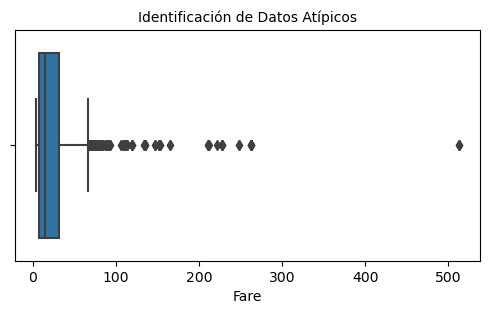

In [314]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Fare'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [315]:
nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Data['Fare']<nivel_minimo)|(Data['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 500


In [316]:
Data=Data[(Data['Fare']<nivel_maximo)&(Data['Fare']>nivel_minimo)]

In [317]:
Total_Atipicos=((Data['Fare']<nivel_minimo)|(Data['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [318]:
Data['Survived'] = Data['Survived'].astype('int64')

In [319]:
Data.drop('Name', axis=1, inplace=True)

In [325]:
Data.drop('Sex', axis=1, inplace=True)

In [327]:
Data.drop('Age', axis=1, inplace=True)

In [334]:
Data.drop('Ticket', axis=1, inplace=True)

In [340]:
Data.drop('Cabin', axis=1, inplace=True)

In [341]:
Data.drop('Embarked', axis=1, inplace=True)

In [342]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 1 to 889
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  391 non-null    int64  
 1   Survived     391 non-null    int64  
 2   Pclass       391 non-null    int64  
 3   SibSp        391 non-null    float64
 4   Parch        391 non-null    float64
 5   Fare         391 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 21.4 KB


In [343]:
Data['Survived'].value_counts()

Survived
1    200
0    191
Name: count, dtype: int64

In [344]:
Data[['Survived']].head(40)

,Survived
1,1
3,1
6,0
7,0
9,1
11,1
13,0
16,0
20,0
23,1


In [345]:
M = Data.drop('Survived',axis=1) 
N = Data['Survived']

M_train, M_test, N_train, N_test = train_test_split(M, N, test_size=0.25, stratify=N, random_state= 0)

In [346]:
print (M_train)

     PassengerId  Pclass     SibSp     Parch     Fare
634          635       3  3.000000  2.000000  27.9000
533          534       3  0.523008  2.000000  22.3583
493          494       1  0.523008  0.381594  49.5042
449          450       1  0.523008  0.381594  30.5000
848          849       2  0.523008  1.000000  33.0000
..           ...     ...       ...       ...      ...
177          178       1  0.523008  0.381594  28.7125
551          552       2  0.523008  0.381594  26.0000
546          547       2  1.000000  0.381594  26.0000
504          505       1  0.523008  0.381594  86.5000
543          544       2  1.000000  0.381594  26.0000

[293 rows x 5 columns]


In [347]:
print (N_train)

634    0
533    1
493    0
449    1
848    0
      ..
177    0
551    0
546    1
504    1
543    1
Name: Survived, Length: 293, dtype: int64


In [348]:
print(Data['Survived'].unique())

[1 0]


In [349]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (M_train , N_train)
Prediccion = modelo_regresion.predict(M_test)

In [350]:
print (N_test)

291    1
35     0
435    1
787    0
257    1
      ..
452    0
820    1
849    1
218    1
224    1
Name: Survived, Length: 98, dtype: int64


In [351]:
print (Prediccion)

[1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1
 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1]


In [352]:
print(classification_report(N_test,Prediccion))

              precision    recall  f1-score   support

           0       0.68      0.56      0.61        48
           1       0.64      0.74      0.69        50

    accuracy                           0.65        98
   macro avg       0.66      0.65      0.65        98
weighted avg       0.66      0.65      0.65        98



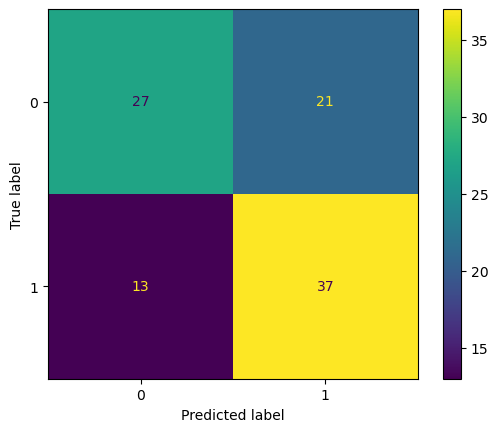

In [353]:
cm=confusion_matrix(N_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

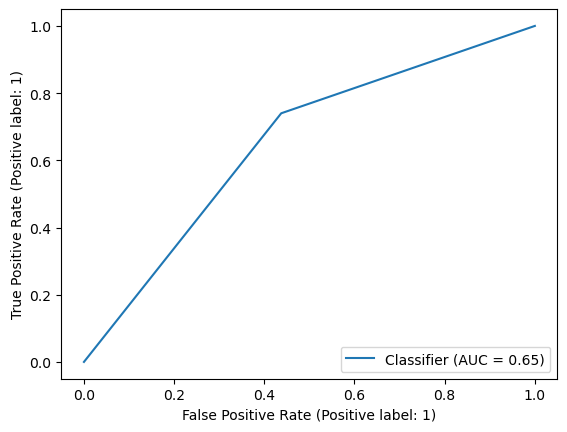

In [354]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(N_test, Prediccion)
plt.show()